In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('LunarLander-v2',
                       continuous=True,
                       render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 400:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

array([-5.5732729e-04,  1.4017692e+00, -5.6461025e-02, -4.0671340e-01,
        6.5254071e-04,  1.2789289e-02,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

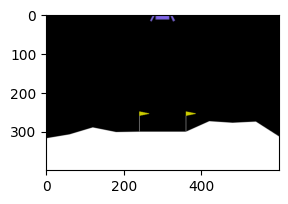

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
env.action_space= Box(-1.0, 1.0, (2,), float32)
state= [ 0.00262108  1.416303    0.2654778   0.23924235 -0.00303044 -0.06013473
  0.          0.        ]
action= [-0.6357824  -0.06871741]
next_state= [ 0.00524225  1.4211081   0.265119    0.21354581 -0.0060019  -0.05943376
  0.          0.        ]
reward= 0.9163025709748922
done= False
info= {}


In [4]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = PPO(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=1024,  #运行N步后执行更新,buffer_size=n_steps*环境数量
    batch_size=64,  #采样数据量
    n_epochs=16,  #每次采样后训练的次数
    gamma=0.99,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-270.40662152247387, 157.04002772963742)

In [6]:
# #训练
# model.learn(100_0000, progress_bar=True)

# #保存模型
# model.save('save/2.PPO.Lunar Lander Continuous')

Output()

In [7]:
#加载模型
model = PPO.load('save/2.PPO.Lunar Lander Continuous')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(251.44117638377293, 64.62917913218226)

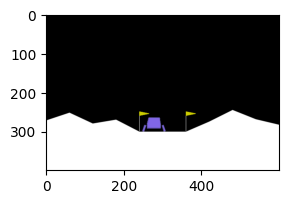

266.9408517815397 171 [1.8299488652012883, 1.9649769051223984, 2.010039139768139, 2.0438045380105336, 2.066386786754265, 2.070322877108822, 2.041754027990862, 1.953044427117561, 1.7477683884659143, 1.3195227671954228, 0.550252749318247, -0.45065189390112437, -1.285118543664396, -1.7716930396991586, -2.0096940424465686, -2.1150649757676945, -2.152399718541716, -2.1533388896427823, -2.1335824361738673, -2.1013945397513965, -2.0613617685707766, -2.01612723635796, -1.9673619849544934, -1.916079989134147, -1.9543691028086414, -1.8063912271767038, -1.750898103582358, -1.6946710247575538, -1.6378091198812967, -1.58048418024336, -1.5227725428478323, -1.464741892070208, -1.4064540485665873, -1.3479727307947655, -1.289310538155405, -1.230486911881826, -1.1715421892810127, -1.1125101060586076, -1.05339636742508, -0.830260874718349, -0.8252553029220167, -0.7658465308285827, -0.706386894426231, -0.6468898411372379, -0.5873880159856242, -0.5278389684597471, -0.4682954487392408, -0.4087408357902689, 

In [13]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()